In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nibabel as nib
from glob import glob
import os
%matplotlib inline
import ctvis2

In [2]:
df = ctvis2.get_df_all()
df

,FilePathImage,FileName,FilePathMask
0,public-covid-data/rp_im/8.nii.gz,8.nii.gz,public-covid-data/rp_msk/8.nii.gz
1,public-covid-data/rp_im/3.nii.gz,3.nii.gz,public-covid-data/rp_msk/3.nii.gz
2,public-covid-data/rp_im/2.nii.gz,2.nii.gz,public-covid-data/rp_msk/2.nii.gz
3,public-covid-data/rp_im/5.nii.gz,5.nii.gz,public-covid-data/rp_msk/5.nii.gz
4,public-covid-data/rp_im/4.nii.gz,4.nii.gz,public-covid-data/rp_msk/4.nii.gz
5,public-covid-data/rp_im/9.nii.gz,9.nii.gz,public-covid-data/rp_msk/9.nii.gz
6,public-covid-data/rp_im/1.nii.gz,1.nii.gz,public-covid-data/rp_msk/1.nii.gz
7,public-covid-data/rp_im/6.nii.gz,6.nii.gz,public-covid-data/rp_msk/6.nii.gz
8,public-covid-data/rp_im/7.nii.gz,7.nii.gz,public-covid-data/rp_msk/7.nii.gz


In [58]:
sample_path = df["FilePathImage"].iloc[0]
data = ctvis2.load_nifti(sample_path)

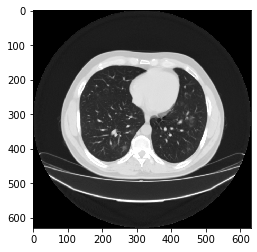

In [60]:
plt.imshow(data[:, :, 10], cmap="gray")

In [100]:
p = df["FilePathMask"].iloc[0]
seg_data = ctvis2.load_nifti(p)
seg_data.shape

(630, 630, 45)

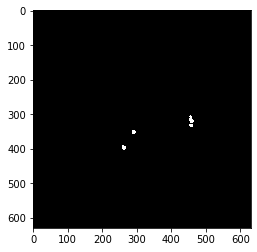

In [63]:
plt.imshow(seg_data[:, :, 10], cmap="gray")

In [111]:
index = 8
volume = ctvis2.load_nifti(df.iloc[index]["FilePathImage"])
mask = ctvis2.load_nifti(df.iloc[index]["FilePathMask"])
mask_color = ctvis2.label_color(mask)
volume_gray = ctvis2.hu_to_gray(volume)
overlayed = ctvis2.overlay(volume_gray, mask, mask_color, alpha=0.7)

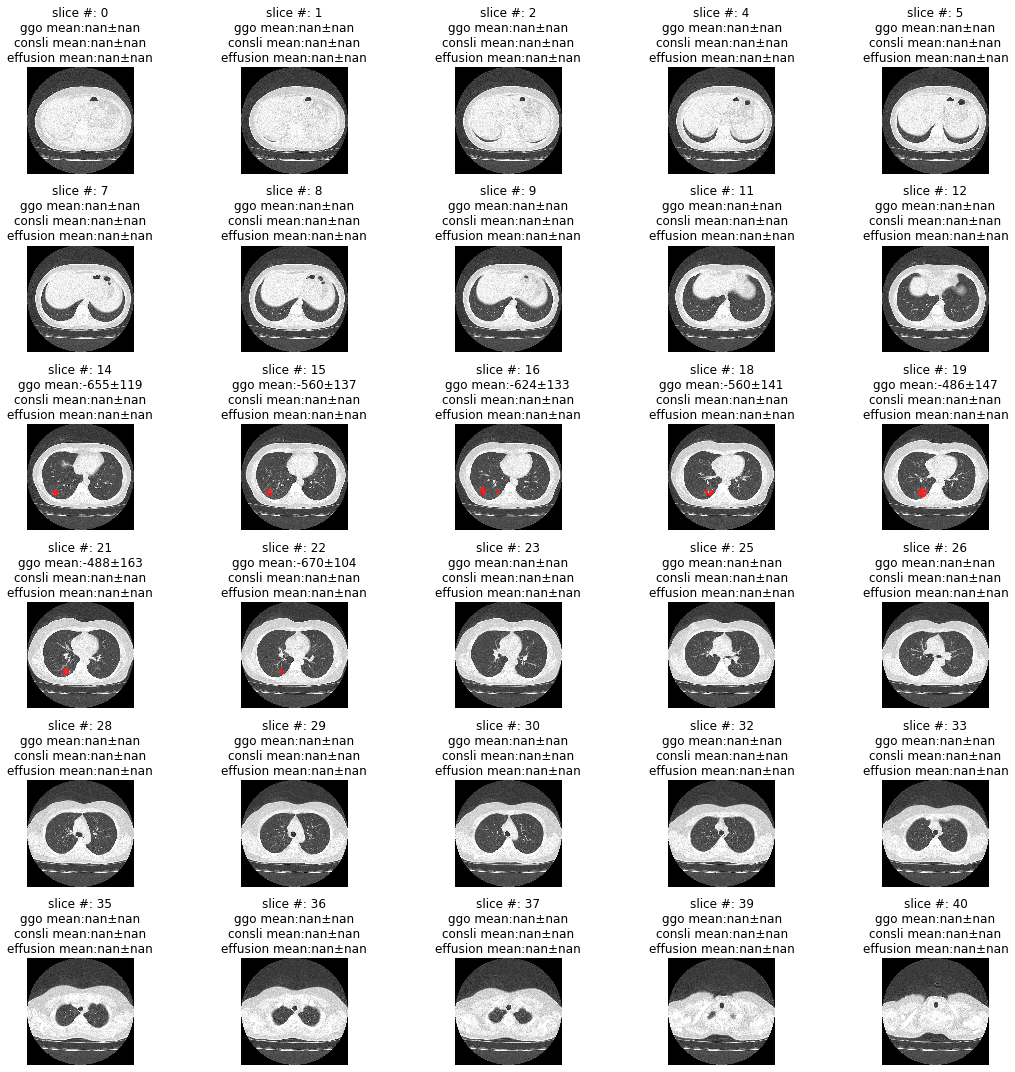

In [112]:
ctvis2.vis_overlay(overlayed, volume, mask, cols=5, display_num=30, figsize=(15, 15))